# PROJECT DESCRIPTION 

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 

IMPORTING REQUIRED LIBRARIRES

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import csv
import chardet

In [15]:
rawdata=open(r"C:\Users\No\OneDrive\Desktop\FLIPROBO\Micro-Credit-Project\Micro Credit Project\Data file.csv",'rb').read()
result=chardet.detect(rawdata)
charenc=result['encoding']
print(charenc)

ascii


# IMPORTING DATASET

In [16]:
df=pd.read_csv(r"C:\Users\No\OneDrive\Desktop\FLIPROBO\Micro-Credit-Project\Micro Credit Project\Data file.csv",encoding="ascii")

In [17]:
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

From the description of the columns provided we can infer that columns msisdn,pcircle and pdate is of no use for modelling the dataset so we can drop these column

In [18]:
del df["msisdn"]

In [19]:
df.head()

Unnamed: 0  label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0           1      0  272.0   3055.050000   3065.150000    220.13    260.13   
1           2      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2           3      1  535.0   1398.000000   1398.000000    900.13    900.13   
3           4      1  241.0     21.228000     21.228000    159.42    159.42   
4           5      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0                2.0                0.0              1539  ...   
1               20.0                0.0              5787  ...   
2                3.0                0.0              1539  ...   
3               41.0                0.0               947  ...   
4                4.0                0.0              2309  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 36 columns]

In [20]:
del df["pcircle"]

In [21]:
del df["pdate"]

In [22]:
df

Unnamed: 0  label     aon  daily_decr30  daily_decr90  rental30  \
0                1      0   272.0   3055.050000   3065.150000    220.13   
1                2      1   712.0  12122.000000  12124.750000   3691.26   
2                3      1   535.0   1398.000000   1398.000000    900.13   
3                4      1   241.0     21.228000     21.228000    159.42   
4                5      1   947.0    150.619333    150.619333   1098.90   
...            ...    ...     ...           ...           ...       ...   
209588      209589      1   404.0    151.872333    151.872333   1089.19   
209589      209590      1  1075.0     36.936000     36.936000   1728.36   
209590      209591      1  1013.0  11843.111667  11904.350000   5861.83   
209591      209592      1  1732.0  12488.228333  12574.370000    411.83   
209592      209593      1  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0                 2            12              6.0                 0.0   
1                 1            12             12.0                 0.0   
2                 1             6              6.0                 0.0   
3                 2            12              6.0                 0.0   
4                 7            42              6.0                 0.0   
...             ...           ...              ...                 ...   
209588            2            12              6.0                 0.0   
209589            3            18              6.0                 0.0   
209590            4            42             12.0                 0.0   
209591            2            18             12.0                 0.0   
209592            2            18             12.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0               2.0            12                6                 0.0   
1               1.0            12               12                 0.0   
2               1.0             6                6                 0.0   
3               2.0            12                6                 0.0   
4               7.0            42                6                 0.0   
...             ...           ...              ...                 ...   
209588          2.0            12                6                 0.0   
209589          3.0            18                6                 0.0   
209590          6.0            54               12                 0.0   
209591          3.0            24               12                 0.0   
209592          2.0            18               12                 0.0   

        payback30  payback90  
0       29.000000  29.000000  
1        0.000000   0.000000  
2        0.000000   0.000000  
3        0.000000   0.000000  
4        2.333333   2.333333  
...           ...        ...  
209588   1.000000   1.000000  
209589   1.000000   1.000000  
209590   4.000000   3.833333  
209591   0.000000  10.500000  
209592   0.0000

Now after deleting unnecessary columns we found the dataset contains 209593 rows and 34 columns

In [23]:
df.columns

Index(['Unnamed: 0', 'label', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90'],
      dtype='object')

In [24]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

From the label outcome we found that there is data imbalance so we have to treat it and we will do it in the subsequent steps

In [25]:
#checking for null values
df.isnull().sum()

Unnamed: 0              0
label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

As given in the data description as well as from the evident it is proved that there are no null values in the dataset so we don't have to treat the null values

# EXPLORATORY DATA ANALYSIS

In the dataset we can see that the range of different columns varies at a greater intervals so we have to scale the data which we can do at the time of Model Splitting and training

In [26]:
#statistical summary
df.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  ...    cnt_loans30   amnt_loans30  \
count      209593.000000     209593.000000  ...  209593.000000  209593.000000   
mean         3712.202921       2064.452797  ...       2.758981      17.952021   
std         53374.833430       2370.786034  ...       2.554502      17.379741   
min           -29.000000          0.000000  ...       0.000000       0.000000   
25%             0.000000        770.000000  ...       1.000000       6.000000   
50%             0.000000       1539.000000  ...       2.000000      12.000000   
75%             0.000000       2309.000000  ...       4.000000      24.000000   
max        999171.809410      55000.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 34 columns]

The statistical Summary suggests presence of outliers. So we have to remove the outliers provided there is no more than 8% loss of data

In [27]:
#checking Correlation
corr_matrix=df.corr()
corr_matrix['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
Unnamed: 0              0.000403
maxamnt_loans30         0.000248
fr_da_rech

The correlation value suggests weak correlation between the target column and other columns. However as the data is not scaled we can see the correlation value after scaling the data.

# Outliers Checking

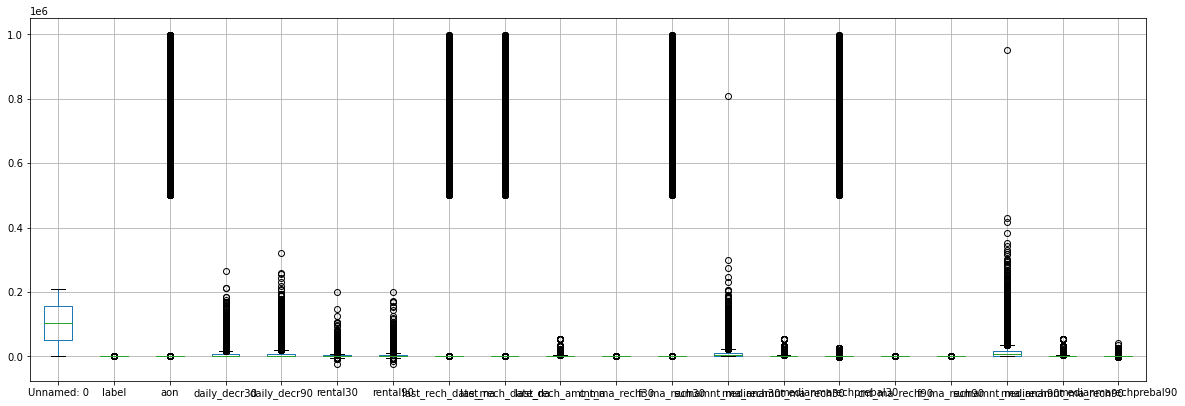

In [28]:
df.iloc[:,0:20].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

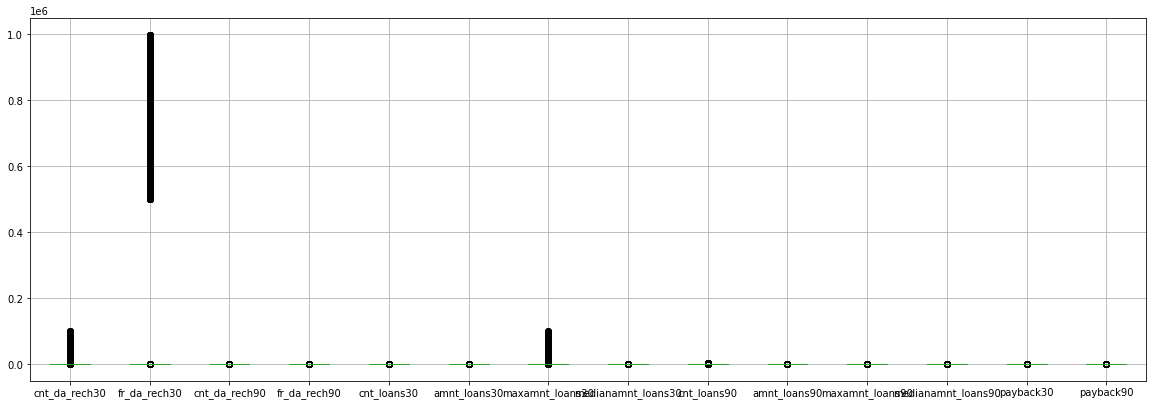

In [29]:
df.iloc[:,20:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

The boxplot graph suggests presence of outliers. So we will be removing the outliers within the given range

# REMOVING OUTLIERS

In [30]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(209593, 34)

In [31]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([16, 16, 33, ..., 29, 27, 31], dtype=int64))


In [32]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(209593, 34)
(161465, 34)


# Percentage of Data Loss

In [33]:
loss_percentage=(209593-161465)/209593*100
print(loss_percentage)

22.962598941758554


There is a huge data loss let us try by increasing the threshold value to 5

In [34]:
z=np.abs(zscore(df))
z.shape

(209593, 34)

In [35]:
threshold=5
print(np.where(z>5))

(array([    30,     53,     65, ..., 209533, 209550, 209576], dtype=int64), array([ 7,  7,  2, ...,  7, 29,  2], dtype=int64))


In [36]:
df_new=df[(z<5).all(axis=1)]
print(df.shape)
print(df_new.shape)

(209593, 34)
(190496, 34)


In [37]:
loss_percentage=(209593-190496)/209593*100
print(loss_percentage)

9.111468417361266


Though data loss is small but not within the acceptable range let us increase the threshold value to 6

In [38]:
threshold=6
print(np.where(z>6))

(array([    30,     53,     65, ..., 209531, 209533, 209576], dtype=int64), array([7, 7, 2, ..., 8, 7, 2], dtype=int64))


In [39]:
df_new=df[(z<6).all(axis=1)]
print(df.shape)
print(df_new.shape)

(209593, 34)
(193906, 34)


In [40]:
loss_percentage=(209593-193906)/209593*100
print(loss_percentage)

7.48450568482726


Now the data loss within the acceptable range so we will use this new dataset

# SPLITTING DATASET

In [41]:
x=df_new.drop("label",axis=1)

In [42]:
x.head()

Unnamed: 0    aon  daily_decr30  daily_decr90  rental30  rental90  \
0           1  272.0   3055.050000   3065.150000    220.13    260.13   
1           2  712.0  12122.000000  12124.750000   3691.26   3691.26   
2           3  535.0   1398.000000   1398.000000    900.13    900.13   
3           4  241.0     21.228000     21.228000    159.42    159.42   
4           5  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0            2            12              6.0                 0.0   
1            1            12             12.0                 0.0   
2            1             6              6.0                 0.0   
3            2            12              6.0                 0.0   
4            7            42              6.0                 0.0   

   cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0          2.0            12                6                 0.0  29.000000   
1          1.0            12               12                 0.0   0.000000   
2          1.0             6                6                 0.0   0.000000   
3          2.0            12                6                 0.0   0.000000   
4          7.0            42                6                 0.0   2.333333   

   payback90  
0  29.000000  
1   0.000000  
2   0.000000  
3   0.000000  
4   2.333333  

[5 rows x 33 columns]

In [43]:
x.shape

(193906, 33)

In [44]:
y=df_new["label"]

In [45]:
y.shape

(193906,)

# Transforming Skewness

In [46]:
from sklearn.preprocessing import power_transform

In [47]:
x.skew()

Unnamed: 0              -0.000006
aon                      0.947867
daily_decr30             2.453814
daily_decr90             2.595149
rental30                 2.631426
rental90                 2.759309
last_rech_date_ma        3.107505
last_rech_date_da        9.967871
last_rech_amt_ma         2.248388
cnt_ma_rech30            1.829448
fr_ma_rech30             2.015434
sumamnt_ma_rech30        2.280079
medianamnt_ma_rech30     2.455330
medianmarechprebal30    10.838530
cnt_ma_rech90            1.989332
fr_ma_rech90             2.259902
sumamnt_ma_rech90        2.354024
medianamnt_ma_rech90     2.467533
medianmarechprebal90     5.479082
cnt_da_rech30           34.810210
fr_da_rech30            88.493646
cnt_da_rech90            7.424236
fr_da_rech90            68.985611
cnt_loans30              2.061551
amnt_loans30             2.093557
maxamnt_loans30         36.620491
medianamnt_loans30       4.082281
cnt_loans90             44.705457
amnt_loans90             2.333483
maxamnt_loans9

In [48]:
x=power_transform(x,method="yeo-johnson")

In [49]:
x.shape

(193906, 33)

# Scaling the data

In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.19607061, -0.7245837 ,  0.4320914 , ..., -0.24384928,
         1.83468301,  1.83139878],
       [-2.19571959,  0.24944094,  1.15856486, ..., -0.24384928,
        -0.93002259, -1.0096299 ],
       [-2.19540191, -0.10820981,  0.09595218, ..., -0.24384928,
        -0.93002259, -1.0096299 ],
       ...,
       [ 1.55362982,  0.79699249,  1.14468004, ..., -0.24384928,
         0.99397582,  0.77592724],
       [ 1.55364247,  1.92420009,  1.17640869, ..., -0.24384928,
        -0.93002259,  1.37247479],
       [ 1.55365513,  1.70265588,  0.61654001, ..., -0.24384928,
        -0.93002259, -1.0096299 ]])

# Training the model without treating data imbalance

In [51]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Finding Best Random State

In [42]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predlr=LR.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy Score is: ",maxAccu,"on Random_state: ",maxRS)

KeyboardInterrupt: 

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=190)

In [53]:
def eval(x):
    mod=x
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    print(accuracy_score(y_test,pred))
    print(recall_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    
    

In [54]:
eval(LogisticRegression())

0.8864230213848587
0.9822506073191756
[[ 1427  5701]
 [  906 50138]]
              precision    recall  f1-score   support

           0       0.61      0.20      0.30      7128
           1       0.90      0.98      0.94     51044

    accuracy                           0.89     58172
   macro avg       0.75      0.59      0.62     58172
weighted avg       0.86      0.89      0.86     58172



as we see the recall score and confusion matrix is not accepttable we will go for treating data imbalance

# MACHINE LEARNING WITH SMOTE

In [55]:
!pip install imbalanced-learn

In [56]:
from imblearn import under_sampling, over_sampling

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
sm=SMOTE(random_state=190)

In [59]:
x_sm,y_sm=sm.fit_resample(x,y)
print(f'''shape of x before SMOTE: {x.shape}
shape of x after SMOTE:{x_sm.shape}''')

print('\nBalance of Positive and Negative classes (%):')
y_sm.value_counts(normalize=True)*100


shape of x before SMOTE: (193906, 33)
shape of x after SMOTE:(338986, 33)

Balance of Positive and Negative classes (%):


1    50.0
0    50.0
Name: label, dtype: float64

# Finding Best Random State in SMOTE

In [54]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_sm_train,x_sm_test,y_sm_train,y_sm_test=train_test_split(x_sm,y_sm,test_size=0.3,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_sm_train,y_sm_train)
    predlr=LR.predict(x_sm_test)
    acc=accuracy_score(y_sm_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy Score is: ",maxAccu,"on Random_state: ",maxRS)

Best Accuracy Score is:  0.7799716803020768 on Random_state:  183


In [60]:
x_sm_train,x_sm_test,y_sm_train,y_sm_test=train_test_split(x_sm,y_sm,test_size=0.3,random_state=183)

In [61]:
def eval(x):
    mod=x
    mod.fit(x_sm_train,y_sm_train)
    pred=mod.predict(x_sm_test)
    print(accuracy_score(y_sm_test,pred))
    print(confusion_matrix(y_sm_test,pred))
    print(classification_report(y_sm_test,pred))

In [62]:
eval(LogisticRegression())

0.7799716803020768
[[40610 10221]
 [12155 38710]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78     50831
           1       0.79      0.76      0.78     50865

    accuracy                           0.78    101696
   macro avg       0.78      0.78      0.78    101696
weighted avg       0.78      0.78      0.78    101696



In [63]:
eval(DecisionTreeClassifier())

0.8919229861548144
[[45727  5104]
 [ 5887 44978]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     50831
           1       0.90      0.88      0.89     50865

    accuracy                           0.89    101696
   macro avg       0.89      0.89      0.89    101696
weighted avg       0.89      0.89      0.89    101696



# Cross Validation 

In [66]:
scr=cross_val_score(LogisticRegression(),x,y,cv=5)
print("scr for LR",scr.mean())

scr for LR 0.8836188664091328


In [67]:
scr=cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
print("scr for DTC",scr.mean())

scr for DTC 0.7667690647480685


In [68]:
#calculating differencec between accuracy score and cv score
LR1=.7799-0.8836
DTC1=.8919-.7667

In [69]:
LR1

-0.10370000000000001

In [70]:
DTC1

0.12519999999999998

from the above differences we found DTC is the best model

# HYPERPARAMETER TUNING

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
parameters={'max_depth': np.arange(2,10),
           'criterion':['gini','entropy']}

In [73]:
GCV_DTC=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)
GCV_DTC.fit(x_sm_train,y_sm_train)
GCV_DTC.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [79]:
DTC_mod=DecisionTreeClassifier(criterion='entropy',max_depth=9)
DTC_mod.fit(x_sm_train,y_sm_train)
pred=DTC_mod.predict(x_sm_test)
print(accuracy_score(y_sm_test,pred)*100)

82.60206891126495


by Hyperparameter Tuning we found accuracy score decreased so its better not to do Hyperparameter tuning and select the model without parameters

In [82]:
DTC=DecisionTreeClassifier()
DTC.fit(x_sm_train,y_sm_train)
pred=DTC.predict(x_sm_test)
print(accuracy_score(y_sm_test,pred)*100)

89.14411579609818


# AUC_ROC CURVE

In [84]:
from sklearn.metrics import plot_roc_curve

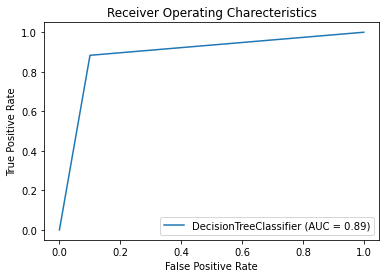

In [85]:
plot_roc_curve(DTC,x_sm_test,y_sm_test)
plt.title("Receiver Operating Charecteristics")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# MODEL SAVING

In [86]:
import joblib
joblib.dump(DTC,"Micro_Credit_Defaulter_Case_Final_Model.pkl")

['Micro_Credit_Defaulter_Case_Final_Model.pkl']